In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [2]:
# set display's options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)

In [3]:
# choosen columns (3x numerical, 1x yes/no and 1x category)
df1 = pd.read_csv('survey_results_public.csv',
                  usecols=['Respondent', 'YearsCodePro', 'WorkWeekHrs',
                           'Age', 'Hobbyist', 'OpSys'],
                  index_col='Respondent')

In [4]:
#2
df1.dropna(inplace=True)
# replace value (we need float or int (no objects))
df1.replace(to_replace='Less than 1 year', value='0', inplace=True)
df1.replace(to_replace='More than 50 years', value='51', inplace=True)
# change yes/no values to 1/0 values
df1.replace(to_replace='Yes', value='1', inplace=True)
df1.replace(to_replace='No', value='0', inplace=True)

In [5]:
df1['YearsCodePro'] = df1['YearsCodePro'].astype(float)
df1['Hobbyist'] = df1['Hobbyist'].astype(float)

In [6]:
print(df1.dtypes)
# cor check
df1.corr()

Hobbyist        float64
YearsCodePro    float64
WorkWeekHrs     float64
OpSys            object
Age             float64
dtype: object


,Hobbyist,YearsCodePro,WorkWeekHrs,Age
Hobbyist,1.000000,-0.025419,0.000928,-0.058456
YearsCodePro,-0.025419,1.000000,0.015847,0.827884
WorkWeekHrs,0.000928,0.015847,1.000000,0.019748
Age,-0.058456,0.827884,0.019748,1.000000


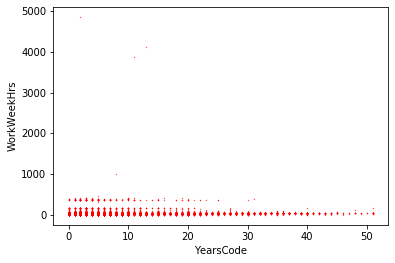

In [7]:
# plot check
plt.plot(df1['YearsCodePro'], df1['WorkWeekHrs'], 'ro', markersize=0.3)
plt.xlabel('YearsCode')
plt.ylabel('WorkWeekHrs')
plt.show()

In [10]:
#3
# one-hot encoding (get_dummies) and join both data frames (df1 and one_hot)
one_hot = pd.get_dummies(df1["OpSys"])
one_hot.dropna(inplace=True)
df1 = df1.join(one_hot)
df1.head()

,Hobbyist,YearsCodePro,WorkWeekHrs,OpSys,Age,BSD,Linux-based,MacOS,Windows
Respondent,,,,,,,,,
3,1.0,1.0,40.0,Linux-based,28.0,0,1,0,0
4,0.0,0.0,80.0,Windows,22.0,0,0,0,1
5,1.0,9.0,55.0,Linux-based,30.0,0,1,0,0
6,1.0,3.0,15.0,Windows,28.0,0,0,0,1
7,0.0,4.0,32.0,Windows,42.0,0,0,0,1


In [11]:
# check types of df
print(df1.dtypes)

Hobbyist        float64
YearsCodePro    float64
WorkWeekHrs     float64
OpSys            object
Age             float64
BSD               uint8
Linux-based       uint8
MacOS             uint8
Windows           uint8
dtype: object


          Hobbyist  YearsCodePro   WorkWeekHrs           Age           BSD  \
count  60063.00000  60063.000000  60063.000000  60063.000000  60063.000000   
mean       0.79017      8.043704     42.124276     31.490363      0.000849   
std        0.40719      7.343599     38.116684      8.277101      0.029127   
min        0.00000      0.000000      1.000000      1.000000      0.000000   
25%        1.00000      3.000000     40.000000     26.000000      0.000000   
50%        1.00000      6.000000     40.000000     30.000000      0.000000   
75%        1.00000     11.000000     44.000000     35.000000      0.000000   
max        1.00000     51.000000   4850.000000     99.000000      1.000000   

        Linux-based         MacOS       Windows  
count  60063.000000  60063.000000  60063.000000  
mean       0.246791      0.299868      0.452492  
std        0.431148      0.458204      0.497742  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000

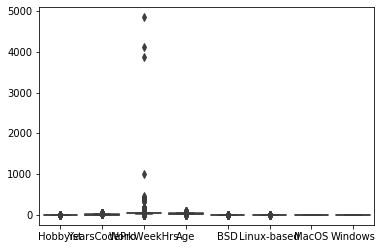

In [12]:
# df1 describe and boxplot before remove the outliers
print(df1.describe())
sns.boxplot(data=df1)
plt.show()

In [13]:
# remove outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# descrabe frame after remove outliers
df_no_outliers.describe()

,Hobbyist,YearsCodePro,WorkWeekHrs,Age,BSD,Linux-based,MacOS,Windows
count,28251.0,28251.000000,28251.000000,28251.000000,28251.0,28251.0,28251.000000,28251.000000
mean,1.0,6.964815,41.109221,30.289784,0.0,0.0,0.417791,0.582209
std,0.0,5.428744,3.670227,6.114187,0.0,0.0,0.493204,0.493204
min,1.0,0.000000,34.000000,13.000000,0.0,0.0,0.000000,0.000000
25%,1.0,3.000000,40.000000,26.000000,0.0,0.0,0.000000,0.000000
50%,1.0,5.000000,40.000000,29.000000,0.0,0.0,0.000000,1.000000
75%,1.0,10.000000,42.000000,34.000000,0.0,0.0,1.000000,1.000000
max,1.0,23.000000,50.000000,48.000000,0.0,0.0,1.000000,1.000000


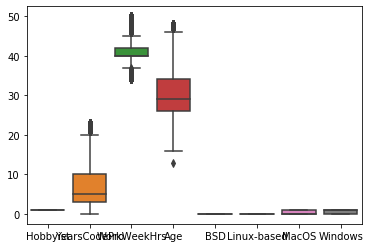

In [15]:
# df1 boxplot after remove the outliers
sns.boxplot(data=df_no_outliers)
plt.show()

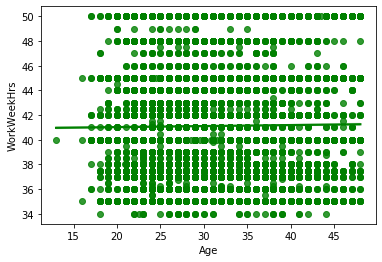

In [16]:
sns.regplot(y=df_no_outliers['WorkWeekHrs'], x=df_no_outliers['Age'], color="g")
plt.show()

In [17]:
#4
# linear regression model (x1)
reg = linear_model.LinearRegression()
reg.fit(df_no_outliers[['WorkWeekHrs']], df_no_outliers['Age'])
# prediction
print(reg.predict([[5]]))
print(reg.coef_)
# mean_squared_error (x1)
y_true1 = [5, 10, 15, 20]
y_pred1 = [reg.predict([[5]]), reg.predict([[10]]),
           reg.predict([[16]]), reg.predict([[20]])]
print(mean_squared_error(y_true1, y_pred1))

[29.46110933]
[0.02294913]
323.5483318553082


In [18]:
# linear regression model (x1 and x2)
reg.fit(df_no_outliers[['WorkWeekHrs', 'YearsCodePro']], df_no_outliers['Age'])
# prediction
print(reg.predict([[8, 4]]))
print(reg.coef_)
# mean_squared_error (x1 and x2)
y_true2 = [8, 10, 7, 20]
y_pred2 = [reg.predict([[4, 8]]), reg.predict([[6, 10]]),
           reg.predict([[7, 15]]), reg.predict([[22, 20]])]
print(mean_squared_error(y_true2, y_pred2))

[27.9274218]
[-0.00562528  0.85961889]
617.6534371522143


In [19]:
# linear regression model (x1 and x2)
reg.fit(df_no_outliers[['WorkWeekHrs', 'YearsCodePro', 'Hobbyist', 'Windows']], df_no_outliers['Age'])
# prediction
print(reg.predict([[2, 6, 1, 0]]))
print(reg.coef_)
# mean_squared_error (x1, x2 and ())
y_true3 = [8, 10, 7, 20]
y_pred3 = [reg.predict([[4, 8, 1, 0]]), reg.predict([[6, 10, 0, 1]]),
           reg.predict([[7, 15, 1, 0]]), reg.predict([[22, 20, 1, 0]])]
print(mean_squared_error(y_true3, y_pred3))

[29.59528985]
[-0.00549855  0.85966048  0.          0.13762185]
615.1181546743169
